# Pillow

In [1]:
# Import Pillow library
from PIL import Image

# Load image from folder
img = Image.open("petridish-bacteria.jpg")

# Print format, size and color mode
print(img.format, img.size, img.mode)

# Open image
img.show()

JPEG (800, 774) RGB


In [2]:
# Convert image from .jpg to .png
jpgfile = "petridish-bacteria.jpg"
pngfile = "petridish-bacteria.png"
try:
    Image.open(jpgfile).save(pngfile)
except IOError:
    print("Cannot convert", jpgfile)

In [3]:
# Create thumbnail
thumbfile = "petridish-bacteria-300x300.JPEG"
size = (300, 300)
try:
    png = Image.open(pngfile)
    png.thumbnail(size)
    png.save(thumbfile, "JPEG")
except IOError:
    print("Cannot create thumbnail for", png)

# Print format, size and color mode and open png
print(png.format, png.size, png.mode)
png.show()

PNG (300, 290) RGB


In [4]:
# Copying a subrectangle from an image
# 4-tuple with coordinates (left, upper, right, lower)
box = (350, 300, 560, 510)
region = img.crop(box)
region.show()

In [5]:
# Transposing an image
png.show()
# FLIP
out = png.transpose(Image.FLIP_TOP_BOTTOM)
# out = png.transpose(Image.FLIP_LEFT_RIGHT)
out.show()

# ROTATE 
out = png.transpose(Image.ROTATE_90)
# out = png.transpose(Image.ROTATE_180)
# out = png.transpose(Image.ROTATE_270)
out.show()

In [6]:
# Image enhancement: contrast
from PIL import ImageEnhance
enh = ImageEnhance.Contrast(png)
enh.enhance(1.3).show(title="30% more contrast")
png.show(title="Original image")

In [7]:
# Image filter: blurring
from PIL import ImageFilter
blurred = png.filter(ImageFilter.BLUR)
blurred.show(title="Blurred version")

# Scikit-image

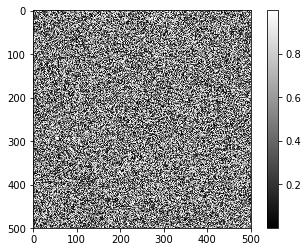

In [9]:
# Images are represented in scikit-image using standard numpy arrays
import numpy as np
from matplotlib import pyplot as plt
random_image = np.random.random([500, 500])
plt.imshow(random_image, cmap='gray')
plt.colorbar();

Type: <class 'numpy.ndarray'>
dtype: uint8
Shape: (774, 800, 3)


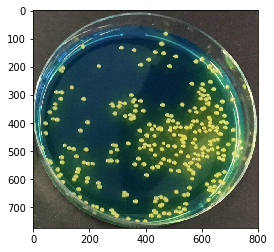

In [23]:
# Color image is 3D array
# Last dimension has size 3 representing red, green and blue channels
from skimage import io
img_bacteria = io.imread('petridish-bacteria.jpg')
print('Type:', type(img_bacteria))
print('dtype:', img_bacteria.dtype)
print('Shape:', img_bacteria.shape)
plt.imshow(img_bacteria);

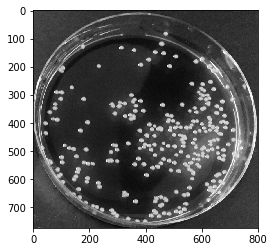

In [25]:
# Convert to grayscale ("black and white")
from skimage import color
img_gray = color.rgb2gray(img_bacteria)
plt.imshow(img_gray, cmap='gray');

### Example: detecting colonies of bacteria in image of petridish

In [46]:
# Select region of image with colonies and save
img_bacteria = Image.open("petridish-bacteria.jpg")
# left, upper, right, lower
box = (400, 300, 550, 450)
colonies = img_bacteria.crop(box)
colonies.show()
colonies_file = "colonies.jpg"
try:
    colonies.save(colonies_file)
except IOError:
    print("Cannot save file", colonies)

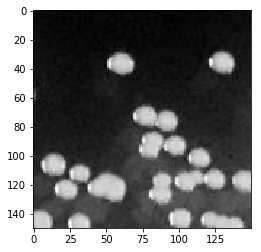

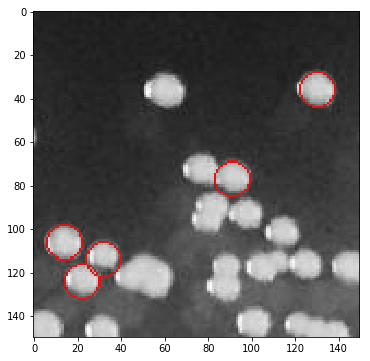

In [114]:
################################################################################
from skimage import color
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte
# Load colonies image and convert
img_read = io.imread(colonies_file)
img_colonies = color.rgb2gray(img_read)
plt.imshow(img_colonies, cmap='gray');
image = img_as_ubyte(img_colonies)
################################################################################
from skimage.feature import canny
# Detect edges
edges = canny(image, low_threshold=10, high_threshold=50)
################################################################################
import numpy as np
from skimage.transform import hough_circle, hough_circle_peaks
# Detect 10 radii
hough_radii = np.arange(8, 16, 10)
hough_res = hough_circle(edges, hough_radii)
# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=5)
################################################################################
# Draw them
from skimage.draw import circle_perimeter
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (220, 20, 20)
ax.imshow(image, cmap=plt.cm.gray)
plt.show()
################################################################################